Код ниже для обновления sqlite3, так как встроенная в колаб версия не поддерживает оконные функции

In [ ]:
! gdown 1CDqqyKV9BvrvnuR1l8HVz0aYuM4yOTUr
! mv _sqlite3.cpython-38-x86_64-linux-gnu.so /usr/lib/python3.8/lib-dynload/
import os
os.kill(os.getpid(), 9)

Downloading...
From: https://drive.google.com/uc?id=1CDqqyKV9BvrvnuR1l8HVz0aYuM4yOTUr
To: /content/_sqlite3.cpython-38-x86_64-linux-gnu.so
100% 6.59M/6.59M [00:00<00:00, 106MB/s]


Если версия sqlite ниже 3.4 выполняем обновление, после этого перезапустится среда и выполняем весь код пропуская первую ячейку. 

CTRL + F10 с этой ячейки :)

In [ ]:
import sqlite3

In [ ]:
sqlite3.sqlite_version

'3.40.0'

#Тестовое задание

##Начальные данные

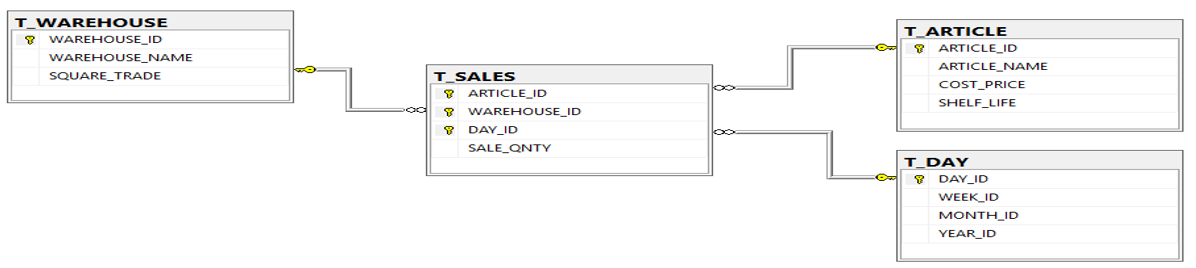

База данных представляет из себя 4 связанные таблицы.

**T_WAREHOUSE**         #Таблица магазины

WAREHOUSE_ID - айди магазина

WAREHOUSE_NAME - название магазина

SQUARE_TRADE - площадь магазина

**T_SALES**  #Таблица продажи

ARTICLE_ID - айди товара

WAREHOUSE_ID - айди магазина

DAY_ID - дата (день, месяц, год)

SALE_QNTY - продажи за день


**T_ARTICLE** #Таблица товары

ARTICLE_ID - айди товара

ARTICLE_NAME - наименование товара

COST_PRICE - стоимость товара

SHELF_PRICE - срок хранения (жизни)

**T_DAY**    #таблица дат

DAY_ID - дата

WEEK_ID - неделя

MONTH_ID - месяц

YEAR_ID - год

##Игрушечные данные для работы

In [ ]:
import pandas as pd
import numpy as np 
import datetime as dt

Выделим основные моменты, которые требуются в заданиях: 

площадь больше 100

срок жизни меньше 5 дней

себестоимость 56 рублей

магазин "Депутатский"

срок меньше 7 дней

2018 год недели с 26 по 32

ARTICLE ID 2654

суммарные продажи больше 100000 р

площадь от 100 до 500 

от 501 до 1000

продажи за 2017 год

магазин "Президент"



##Создаем таблицу T_WAREHOUSE

Для теста будет достаточно 15 магазинов с разными площадями, удовлетворяющие условиям:

1. магазины с площадью до 100

2. магазины с площадью в промежутке от 100 до 500

3. магазины с площадью от 500 до 1000

4. магазины с площадью более 1000

5. магазин "Президент" и магазин "Депутатский"

In [ ]:
shops = ['Депутатский', 'Президент', 'Рабочий', 'Заводской', 
         'Трудовой', 'Новый', 'Березка', 'Продуктовый', 'Крестьянский', 
         'Детский', 'Игровой', 'Старый', 'Верный', 'Труд', 'Май']

In [ ]:
id_shops = [i for i in range(1, 16)]

In [ ]:
square_shops = list(np.random.randint(10, 100, 5)) + list(np.random.randint(100, 200, 5)) + list(np.random.randint(200, 500, 2)) + list(np.random.randint(500, 1000, 1)) + list(np.random.randint(1000, 2000, 2))

In [ ]:
np.random.shuffle(square_shops)

Перезапишем полученные данные, чтобы при перезапуске среды площади не менялись

In [ ]:
square_shops = [71, 488, 47, 149, 47, 52, 340, 1714, 1862, 196, 159, 24, 533, 165, 197]

In [ ]:
warehouse_df = pd.DataFrame({'WAREHOUSE_ID': id_shops, 'WAREHOUSE_NAME': shops, 'SQUARE_TRADE' : square_shops})

In [ ]:
warehouse_df.head()

,WAREHOUSE_ID,WAREHOUSE_NAME,SQUARE_TRADE
0,1,Депутатский,71
1,2,Президент,488
2,3,Рабочий,47
3,4,Заводской,149
4,5,Трудовой,47


##Создаем таблицу T_ARTICLE

In [ ]:
products = ['Молоко', 'Хлеб', 'Масло', 'Яйца', 'Сахар', 'Мука', 'Рис', 'Соль', 'Свинина', 'Говядина', 'Курица', 'Колбаса', 'Сосиски', 'Картофель', 'Морковь', 'Лук', 'Чеснок', 'Огурцы', 'Помидоры', 'Перец', 'Капуста', 'Баклажаны', 'Тыква', 'Лук-порей', 'Салат', 'Зелень', 'Фрукты', 'Ягоды', 'Вино', 'Пиво', 'Водка', 'Сок', 'Чай', 'Кофе', 'Шоколад', 'Конфеты', 'Печенье', 'Чипсы', 'Мороженое', 'Халва', 'Рахат-лукум', 'Хурма', 'Гранаты', 'Абрикосы', 'Вишня', 'Виноград', 'Груши', 'Дыня', 'Земляника', 'Изюм', 'Киви', 'Клюква', 'Лимоны', 'Мандарины', 'Нектарины', 'Апельсины', 'Персики', 'Сливы', 'Яблоки', 'Ананас', 'Бананы', 'Кокос', 'Манго', 'Папайя', 'Хурма', 'Черника', 'Голубика', 'Малина', 'Облепиха', 'Смородина', 'Черешня', 'Клюква', 'Красная смородина', 'Фейхоа', 'Абрикосовое варенье', 'Варенье из клубники', 'Вишневое варенье', 'Грушевое варенье', 'Сливовое варенье', 'Яблочное варенье', 'Конфитюр из абрикосов', 'Конфитюр из вишен', 'Конфитюр из груш', 'Конфитюр из клубники', 'Конфитюр из малины', 'Конфитюр из слив', 'Конфитюр из яблок', 'Кошенные плоды']

In [ ]:
len(products)

88

In [ ]:
id_products = [2654] + list(np.random.randint(1, 2500, 87))

In [ ]:
len(id_products)

88

In [ ]:
np.random.shuffle(id_products)

In [ ]:
id_products = [1453,  37,  1688, 369, 326, 1875, 1034, 225, 435, 388, 417, 751, 481,
                1533, 2091, 259, 919, 1050, 1559, 2002, 250, 1609, 834, 2151, 2377, 1412,
                2153, 1945, 1675, 2155, 979, 2204, 559, 1204, 2191, 435, 853, 2479, 2490,
                2131, 1679, 76, 1574, 543, 263, 1429, 683, 593, 1479, 2330, 949, 1097,
                258, 869, 2216, 2654, 1195, 1390, 1937, 2421, 1887, 862, 436, 2317, 1936,
                145, 29, 1577, 848, 193, 1557, 2087, 2222, 2048, 1414, 1896, 551, 1046,
                1659, 767, 1467, 209, 353, 293, 1197, 2408, 651, 385]


In [ ]:
products_price = list(np.random.randint(10, 50, 10)) + list(np.random.randint(50, 100, 10)) + list(np.random.randint(1, 1000, 68))

In [ ]:
np.random.shuffle(products_price)

In [ ]:
products_price = [465,  60,  21,  89, 791, 951, 688, 250, 314, 41, 307, 33, 436,
                  482, 635, 89, 190, 51, 948, 930, 42, 554, 504, 453, 79, 17, 368,
                  32, 226, 24, 827, 119, 571, 773, 511, 78, 191, 816, 653, 239, 629,
                  240, 69, 708, 236, 58, 515, 444, 515, 405, 291, 135, 30, 846, 552,
                  292, 645, 469, 34, 962, 67, 862, 269, 545, 321, 17, 62, 16, 577, 703,
                  636, 683, 41, 72, 661, 454, 480, 769, 308, 797, 88, 267, 796, 50, 1,
                  857, 633, 411]

In [ ]:
products_life= list(np.random.randint(1, 5, 10)) + list(np.random.randint(5, 8, 10)) + list(np.random.randint(1, 30, 68))

In [ ]:
products_life = [4, 2, 3, 2, 3, 4, 4, 4, 3, 3, 6, 6, 5, 6, 6, 6, 7, 6, 5,
                 5, 13, 11, 21, 19, 19, 20, 22, 24, 9, 27, 21, 20, 18, 22,
                 7, 9, 11, 2, 7, 10, 11, 6, 22, 3, 28, 3, 22, 19, 15, 28,
                 27, 7, 22, 16, 13, 22, 28, 18, 13, 5, 14, 29, 29, 4, 22,
                 20, 24, 23, 4, 24, 19, 6, 14, 23, 1, 29, 1, 27, 26, 13, 7,
                 27, 27, 28, 21, 29, 25, 11]

In [ ]:
atricle_df = pd.DataFrame({'ARTICLE_ID': id_products, 'ARTICLE_NAME': products, 'COST_PRICE' : products_price, 'SHELF_LIFE':products_life})

In [ ]:
atricle_df.head()

,ARTICLE_ID,ARTICLE_NAME,COST_PRICE,SHELF_LIFE
0,1453,Молоко,465,4
1,37,Хлеб,60,2
2,1688,Масло,21,3
3,369,Яйца,89,2
4,326,Сахар,791,3


##Создаем таблицу T_DAY

In [ ]:
data_df = pd.date_range(start = '2017-01-01', end = '2018-12-31', freq = 'D')

In [ ]:
data_df

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', length=730, freq='D')

In [ ]:
new_df = pd.DataFrame({
    'WEEK_ID': data_df.week,
    'MONTH_ID': data_df.month,
    'YEAR_ID': data_df.year
}, index = data_df)

<ipython-input-26-e30a1969d5ce>:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  'WEEK_ID': data_df.week,


In [ ]:
new_df = new_df.reset_index().rename(columns={'index': 'DAY_ID'})

In [ ]:
new_df.head()

,DAY_ID,WEEK_ID,MONTH_ID,YEAR_ID
0,2017-01-01,52,1,2017
1,2017-01-02,1,1,2017
2,2017-01-03,1,1,2017
3,2017-01-04,1,1,2017
4,2017-01-05,1,1,2017


##Создаем таблицу T_SALES

In [ ]:
sales_df = pd.DataFrame(columns = ["ARTICLE_ID", "WAREHOUSE_ID", "DAY_ID", "SALE_QNTY"])

In [ ]:
sales_df

,ARTICLE_ID,WAREHOUSE_ID,DAY_ID,SALE_QNTY


In [ ]:
for day_id in data_df:
  rows = np.random.randint(5, 10)
  for i in range(rows):
    article_id = np.random.choice(id_products)
    warehouse_id = np.random.choice(id_shops)
    sale_qnty = np.random.randint(20000, 300000)
    sales_df = sales_df.append({
            "ARTICLE_ID": article_id,
            "WAREHOUSE_ID": warehouse_id,
            "DAY_ID": day_id,
            "SALE_QNTY": sale_qnty     
       
    }, ignore_index = True) 


In [ ]:
sales_df['DAY_ID'].value_counts()

2017-09-15    9
2017-12-18    9
2018-06-27    9
2017-04-29    9
2018-06-24    9
             ..
2018-09-22    5
2018-01-16    5
2018-01-15    5
2018-04-09    5
2018-01-01    5
Name: DAY_ID, Length: 730, dtype: int64

In [ ]:
sales_df.head()

,ARTICLE_ID,WAREHOUSE_ID,DAY_ID,SALE_QNTY
0,559,4,2017-01-01,133774
1,263,8,2017-01-01,150642
2,979,11,2017-01-01,225938
3,1559,10,2017-01-01,72673
4,834,4,2017-01-01,112463


#SQL

##Подключение библиотеки SQL и подготовка данных

In [ ]:
import sqlite3

In [ ]:
con = sqlite3.connect('db')

In [ ]:
sqlite3.sqlite_version

'3.40.0'

In [ ]:
def select(sql):
  return pd.read_sql(sql,con)

In [ ]:
atricle_df.to_sql('T_ARTICLE',con,index=False,if_exists='replace')

In [ ]:
sql = '''SELECT * FROM T_ARTICLE
LIMIT 2'''

In [ ]:
select(sql)

,ARTICLE_ID,ARTICLE_NAME,COST_PRICE,SHELF_LIFE
0,1453,Молоко,465,4
1,37,Хлеб,60,2


In [ ]:
warehouse_df.to_sql('T_WAREHOUSE',con,index=False,if_exists='replace')

In [ ]:
sql = '''SELECT * FROM T_WAREHOUSE
LIMIT 2'''

In [ ]:
select(sql)

,WAREHOUSE_ID,WAREHOUSE_NAME,SQUARE_TRADE
0,1,Депутатский,71
1,2,Президент,488


Приведем даты явно к формату DATE, чтобы исключить появление "HH:MM:SS"

In [ ]:
new_df['DAY_ID'] = new_df['DAY_ID'].dt.date

In [ ]:
new_df.to_sql('T_DAY',con,index=False,if_exists='replace', dtype = {'DAY_ID': 'DATE'})

In [ ]:
sql = '''SELECT * FROM T_DAY
LIMIT 2'''

In [ ]:
select(sql)

,DAY_ID,WEEK_ID,MONTH_ID,YEAR_ID
0,2017-01-01,52,1,2017
1,2017-01-02,1,1,2017


In [ ]:
sales_df['DAY_ID'] = sales_df['DAY_ID'].dt.date

In [ ]:
sales_df.to_sql('T_SALES',con,index=False,if_exists='replace', dtype = {'DAY_ID': 'DATE'})

In [ ]:
sql = '''SELECT * FROM T_SALES
LIMIT 2'''

In [ ]:
select(sql)

,ARTICLE_ID,WAREHOUSE_ID,DAY_ID,SALE_QNTY
0,559,4,2017-01-01,133774
1,263,8,2017-01-01,150642


#Зеленый

##Задание 1

Вывести наименования магазинов (WAREHOUSE_NAME) из справочника T_WAREHOUSE, площадь (SQUARE_TRADE) которых больше 100.

In [ ]:
sql = '''
SELECT WAREHOUSE_NAME
    FROM T_WAREHOUSE
    WHERE SQUARE_TRADE > 100
'''

In [ ]:
select(sql)

,WAREHOUSE_NAME
0,Президент
1,Заводской
2,Березка
3,Продуктовый
4,Крестьянский
5,Детский
6,Игровой
7,Верный
8,Труд
9,Май


##Задание 2

Вывести наименования позиций (ARTICLE_NAME) из справочника T_ARTICLE, со сроком годности (SHELF_LIFE) меньше 5 дней и с себестоимостью (COST_PRICE) больше 56 рублей.

In [ ]:
sql = '''
SELECT ARTICLE_NAME
    FROM  T_ARTICLE
    WHERE SHELF_LIFE < 5 AND COST_PRICE > 56
'''

In [ ]:
select(sql)

,ARTICLE_NAME
0,Молоко
1,Хлеб
2,Яйца
3,Сахар
4,Мука
5,Рис
6,Соль
7,Свинина
8,Чипсы
9,Абрикосы


##Задание 3

Необходимо вывести продажи (SALE_QNTY) магазинов-позиции из T_SALES  только магазинов с площадью(SQUARE_TRADE) от 100 до 200 включительно.

In [ ]:
sql = '''
SELECT SALE_QNTY 
FROM T_SALES 
WHERE WAREHOUSE_ID IN (SELECT WAREHOUSE_ID 
                       FROM T_WAREHOUSE
                       WHERE SQUARE_TRADE BETWEEN 100 AND 200)
'''

In [ ]:
select(sql)

,SALE_QNTY
0,133774
1,225938
2,72673
3,112463
4,220053
...,...
1716,163576
1717,144934
1718,238882
1719,250920


In [ ]:
sql = '''
SELECT s.SALE_QNTY 
  FROM T_SALES s
  INNER JOIN T_WAREHOUSE w
        ON s.WAREHOUSE_ID = w.WAREHOUSE_ID
  WHERE w.SQUARE_TRADE BETWEEN 100 AND 200
'''

In [ ]:
select(sql)

,SALE_QNTY
0,22860
1,24525
2,24659
3,24857
4,29229
...,...
1716,296262
1717,297183
1718,297263
1719,297425


##Задание 4

Вывести продажи (SALE_QNTY) товарных позиций (ARTICLE_NAME), у магазина(WAREHOUSE_NAME) - 'Депутатский', за 2018 год (YEAR_ID) с 26 по 32 неделю(WEEK_ID). 
Также необходимо исключить позиции со сроком годности(SHELF_LIFE) меньше 7.

In [ ]:
sql = '''
SELECT  A.ARTICLE_NAME
        , S.SALE_QNTY,  A.SHELF_LIFE
  FROM T_SALES S
  INNER JOIN T_WAREHOUSE W
            ON S.WAREHOUSE_ID = W.WAREHOUSE_ID
  INNER JOIN T_ARTICLE A
            ON S.ARTICLE_ID = A.ARTICLE_ID
  INNER JOIN T_DAY D
            ON S.DAY_ID = D.DAY_ID
  WHERE W.WAREHOUSE_NAME = 'Депутатский' 
            AND D.WEEK_ID BETWEEN 26 AND 32
            AND D.YEAR_ID = 2018
            AND A.SHELF_LIFE > 7
'''

In [ ]:
select(sql)

,ARTICLE_NAME,SALE_QNTY,SHELF_LIFE
0,Конфитюр из вишен,205088,27
1,Вишня,67682,28
2,Вишня,294317,28
3,Кошенные плоды,42417,11
4,Кошенные плоды,298027,11
5,Кошенные плоды,259815,11
6,Манго,53479,29
7,Манго,77294,29
8,Конфитюр из яблок,101609,25
9,Яблочное варенье,125957,13


##Задание 5

Для каждого магазина из справочника T_WAREHOUSE, необходимо подтянуть его продажи по позиции ARTICLE_ID = 2654 из таблицы T_SALES за дату (DAY_ID) 1 января 2018 года
В случае, если продаж по этой позиции нет, продажи должны быть равны нулю.


In [ ]:
sql = '''
SELECT W.WAREHOUSE_NAME
        , IFNULL(S.SALE_QNTY, 0) AS SALES_2654
  FROM T_WAREHOUSE W
  LEFT JOIN T_SALES S
          ON W.WAREHOUSE_ID = S.WAREHOUSE_ID
              AND S.ARTICLE_ID = 2654 
              AND S.DAY_ID = '2018-01-01'
'''

In [ ]:
select(sql)

,WAREHOUSE_NAME,SALES_2654
0,Депутатский,0
1,Президент,0
2,Рабочий,0
3,Заводской,0
4,Трудовой,0
5,Новый,0
6,Березка,0
7,Продуктовый,0
8,Крестьянский,297405
9,Детский,0


#Оранжевый

##Задание 1

Вывести среднюю себестоимость всех товаров (COST_PRICE) из справочника T_ARTICLE.

In [ ]:
sql = '''
SELECT AVG(COST_PRICE) as AVG_COST_PRICE
    FROM T_ARTICLE 
'''

In [ ]:
select(sql)

,AVG_COST_PRICE
0,390.522727


##Задание 2

Вывести количество дней (DAY_ID) и недель (WEEK_ID) в месяцах (MONTH_ID) 2018 года (YEAR_ID) из таблицы T_DAY.
Месяца отсортировать по возрастанию

In [ ]:
sql = '''
SELECT MONTH_ID 
      , COUNT( DISTINCT DAY_ID) AS COUNT_DAYS 
      , COUNT(DISTINCT WEEK_ID) AS WEEK
  FROM T_DAY
  WHERE YEAR_ID = 2018
  GROUP BY MONTH_ID
  ORDER BY MONTH_ID
'''

In [ ]:
select(sql)

,MONTH_ID,COUNT_DAYS,WEEK
0,1,31,5
1,2,28,5
2,3,31,5
3,4,30,6
4,5,31,5
5,6,30,5
6,7,31,6
7,8,31,5
8,9,30,5
9,10,31,5


##Задание 3

Вывести магазины (WAREHOUSE_ID), у которых суммарные продажи (SALE_QNTY) за 2018 год (YEAR_ID) больше 100 000р.

In [ ]:
sql = '''
SELECT S.WAREHOUSE_ID
        , SUM(S.SALE_QNTY) AS TOTAL_SALE_QNTY_2018
  FROM T_SALES S
  INNER JOIN T_DAY D 
      ON S.DAY_ID = D.DAY_ID 
        AND D.YEAR_ID = 2018
  GROUP BY S.WAREHOUSE_ID
  HAVING SUM(S.SALE_QNTY)  > 100000
'''

In [ ]:
select(sql)

,WAREHOUSE_ID,TOTAL_SALE_QNTY_2018
0,1,30098083
1,2,23591323
2,3,28363219
3,4,31388147
4,5,25207419
5,6,31374164
6,7,25828338
7,8,27502541
8,9,31877269
9,10,27748544


Решение через strftime() только для sqlite.

В Postgresql можно было бы использовать функцию

 `DATE_PART('YEAR', S.DAY_ID)` 

 или 

 `EXTRACT(YEAR FROM S.DAY_ID)`

In [ ]:
sql = '''
SELECT S.WAREHOUSE_ID
        , SUM(S.SALE_QNTY) AS TOTAL_SALE_QNTY_2018
  FROM T_SALES S
  WHERE strftime('%Y' , S.DAY_ID) = '2018'
  GROUP BY S.WAREHOUSE_ID
  HAVING SUM(SALE_QNTY)  > 100000
'''

In [ ]:
select(sql)

,WAREHOUSE_ID,TOTAL_SALE_QNTY_2018
0,1,30098083
1,2,23591323
2,3,28363219
3,4,31388147
4,5,25207419
5,6,31374164
6,7,25828338
7,8,27502541
8,9,31877269
9,10,27748544


##Задание 4

Вывести средние продажи позиции (ARTICLE_ID) с максимальным сроком годности (SHELF_LIFE) за 26 неделю (WEEK_ID) 2018 года (YEAR_ID), у магазинов с площадью от 500-1000 м (SQUARE_TRADE).

In [ ]:
sql = '''
WITH 
    SHELF_MAX_LIFE AS (
                        SELECT ARTICLE_ID
                        FROM T_ARTICLE
                        WHERE SHELF_LIFE = (SELECT MAX(SHELF_LIFE) FROM T_ARTICLE)
                            ), 
    WAREHOUSE_SQUARE_500_1000 AS (
                              SELECT WAREHOUSE_ID 
                              FROM T_WAREHOUSE
                              WHERE SQUARE_TRADE BETWEEN 500 AND 1000
                                  ), 
    WEEK_26_YEAR_2018 AS (
                                SELECT DAY_ID 
                                FROM T_DAY
                                WHERE WEEK_ID = 26 AND YEAR_ID = 2018
                        )
SELECT S.ARTICLE_ID, AVG(S.SALE_QNTY) as AVG_SALES
FROM T_SALES S
  INNER JOIN SHELF_MAX_LIFE AS SHM
            ON S.ARTICLE_ID = SHM.ARTICLE_ID
  INNER JOIN WAREHOUSE_SQUARE_500_1000 AS WS
            ON S.WAREHOUSE_ID = WS.WAREHOUSE_ID
  INNER JOIN WEEK_26_YEAR_2018 AS WY
            ON S.DAY_ID = WY.DAY_ID
GROUP BY S.ARTICLE_ID
'''

In [ ]:
select(sql)

,ARTICLE_ID,AVG_SALES


In [ ]:
sql = '''
SELECT S.ARTICLE_ID
        , AVG(S.SALE_QNTY) AS AVG_SALES
FROM T_SALES S
  JOIN T_ARTICLE A 
              ON S.ARTICLE_ID = A.ARTICLE_ID
  JOIN T_WAREHOUSE W 
              ON S.WAREHOUSE_ID = W.WAREHOUSE_ID
  JOIN T_DAY D 
              ON S.DAY_ID = D.DAY_ID
  WHERE D.WEEK_ID = 26 AND D.YEAR_ID = 2018 
          AND W.SQUARE_TRADE BETWEEN 500 AND 1000 
          AND A.SHELF_LIFE = (SELECT MAX(SHELF_LIFE) FROM T_ARTICLE)
  GROUP BY S.ARTICLE_ID
'''

In [ ]:
select(sql)

,ARTICLE_ID,AVG_SALES


##Задание 5

Вывести количество магазинов с площадью от 100 до 500 и от 501 до 1000 (SQUARE_TRADE).
Необходимо, чтобы эти магазины хотя имели продажу хотя бы по одному товару в период с 18 по 21 неделю 2017 или с 18 по 21 неделю 2018 года.

In [ ]:
sql = '''
WITH 
WEEK_18_21_2017_2018 AS (
                          SELECT DAY_ID
                                  , WEEK_ID
                                  , YEAR_ID
                            FROM T_DAY
                            WHERE (WEEK_ID BETWEEN 18 AND 21 
                                              AND YEAR_ID = 2017)
                                    OR
                                    (WEEK_ID BETWEEN 18 AND 21 
                                              AND YEAR_ID = 2018)
                        ), 
WAREHOUSE_ID_SALES_IN_BT AS ( 
                      SELECT S.WAREHOUSE_ID 
                        FROM T_SALES S
                            INNER JOIN WEEK_18_21_2017_2018 WB
                                  ON S.DAY_ID = WB.DAY_ID
                              GROUP BY S.WAREHOUSE_ID
                              )

SELECT  
    CASE 
    WHEN W.SQUARE_TRADE BETWEEN 100 AND 500 THEN 'SQUARE_BETWEEN_100_500'
    WHEN W.SQUARE_TRADE BETWEEN 501 AND 1000 THEN 'SQUARE_BETWEEN_501_1000'
    END AS CATEGORY_SQAURE
    , COUNT(distinct W.WAREHOUSE_ID) AS COUNT_WAREHOUSE
FROM T_WAREHOUSE W
INNER JOIN WAREHOUSE_ID_SALES_IN_BT WBT
          ON W.WAREHOUSE_ID = WBT.WAREHOUSE_ID
WHERE CATEGORY_SQAURE IS NOT NULL
GROUP BY CATEGORY_SQAURE

'''

In [ ]:
select(sql)

,CATEGORY_SQAURE,COUNT_WAREHOUSE
0,SQUARE_BETWEEN_100_500,7
1,SQUARE_BETWEEN_501_1000,1


#Красный

##Задание 1

Вывести ранг позиций (ARTICLE_ID) по убыванию продаж (SALE_QNTY) магазина 'Депутатский' (WAREHOUSE_NAME) за 12 августа 2018 года (DAY_ID).

In [ ]:
sql = '''
SELECT 
  RANK() OVER(ORDER BY S.SALE_QNTY DESC) AS RANK_SALE
  FROM T_SALES S
  JOIN T_WAREHOUSE W 
            ON S.WAREHOUSE_ID = W.WAREHOUSE_ID 
  WHERE W.WAREHOUSE_NAME = 'Депутатский' 
        AND S.DAY_ID = '2018-08-12'
'''

In [ ]:
select(sql)

,RANK_SALE


##Задание 2

Вывести позиции (ARTICLE_NAME) магазина "Депутатский" (WAREHOUSE_NAME) , которых не было в том же дне в магазине "Президент" (WAREHOUSE_NAME).
Данные следует собирать за 20.09.2018 г.

In [ ]:
sql = '''
WITH 
PRESIDENT_SALES_2018_09_20 AS (
                        SELECT S.ARTICLE_ID
                          FROM T_SALES S
                          JOIN T_WAREHOUSE W
                                  ON S.WAREHOUSE_ID = W.WAREHOUSE_ID
                          WHERE W.WAREHOUSE_NAME = 'Президент' 
                                   AND S.DAY_ID = '2018-09-20'
                                )

SELECT A.ARTICLE_NAME
  FROM T_SALES S
  JOIN T_ARTICLE A 
        ON S.ARTICLE_ID = A.ARTICLE_ID 
  JOIN T_WAREHOUSE W
        ON S.WAREHOUSE_ID = W.WAREHOUSE_ID
  WHERE W.WAREHOUSE_NAME = 'Депутатский'
              AND S.DAY_ID = '2018-09-20'
              AND S.ARTICLE_ID NOT IN (SELECT ARTICLE_ID FROM PRESIDENT_SALES_2018_09_20)
'''

In [ ]:
select(sql)

,ARTICLE_NAME
0,Мороженое


In [ ]:
sql = '''
SELECT ARTICLE_NAME
  FROM T_SALES S
  JOIN T_WAREHOUSE W
         ON S.WAREHOUSE_ID = W.WAREHOUSE_ID
  JOIN T_ARTICLE A
        ON S.ARTICLE_ID = A.ARTICLE_ID
  WHERE W.WAREHOUSE_NAME = 'Депутатский' AND S.DAY_ID = '2018-09-20'

EXCEPT

SELECT ARTICLE_NAME
  FROM T_SALES S
  JOIN T_WAREHOUSE W
         ON S.WAREHOUSE_ID = W.WAREHOUSE_ID
  JOIN T_ARTICLE A
        ON S.ARTICLE_ID = A.ARTICLE_ID
    WHERE W.WAREHOUSE_NAME = 'Президент' 
    AND S.DAY_ID = '2018-09-20'
'''

In [ ]:
select(sql)

,ARTICLE_NAME
0,Мороженое


##Задание 3

Вывести позиции (ARTICLE_NAME) магазина "Депутатский" (WAREHOUSE_NAME), которые также имели продажи на магазине "Президент" (WAREHOUSE_NAME) за 20.09.2018г (DAY_ID).

In [ ]:
sql = '''
WITH 
PRESIDENT_SALES_2018_09_20 AS (
                            SELECT S.ARTICLE_ID
                              FROM T_SALES S
                              JOIN T_WAREHOUSE W
                                      ON S.WAREHOUSE_ID = W.WAREHOUSE_ID
                              WHERE W.WAREHOUSE_NAME = 'Президент' 
                                          AND S.DAY_ID = '2018-09-20'
                                )

SELECT A.ARTICLE_NAME
  FROM T_SALES S
  JOIN T_ARTICLE A 
        ON S.ARTICLE_ID = A.ARTICLE_ID 
  JOIN T_WAREHOUSE W
        ON S.WAREHOUSE_ID = W.WAREHOUSE_ID
  WHERE W.WAREHOUSE_NAME = 'Депутатский'
            AND S.DAY_ID = '2018-09-20'
            AND S.ARTICLE_ID IN (SELECT ARTICLE_ID FROM PRESIDENT_SALES_2018_09_20)
'''

In [ ]:
select(sql)

,ARTICLE_NAME


In [ ]:
sql = '''
SELECT ARTICLE_NAME
  FROM T_SALES S
  JOIN T_WAREHOUSE W
         ON S.WAREHOUSE_ID = W.WAREHOUSE_ID
  JOIN T_ARTICLE A
        ON S.ARTICLE_ID = A.ARTICLE_ID
  WHERE W.WAREHOUSE_NAME = 'Депутатский' AND S.DAY_ID = '2018-09-20'
  AND EXISTS(
              SELECT ARTICLE_NAME
                FROM T_SALES SE
                  JOIN T_WAREHOUSE WE
                         ON SE.WAREHOUSE_ID = WE.WAREHOUSE_ID
                  JOIN T_ARTICLE AE
                        ON SE.ARTICLE_ID = AE.ARTICLE_ID
                  WHERE WE.WAREHOUSE_NAME = 'Президент' 
                              AND SE.DAY_ID = '2018-09-20'
              )
'''

In [ ]:
select(sql)

,ARTICLE_NAME


##Задание 4

Вывести топ-3 позиции (ARTICLE_NAME) по объему продаж (SALE_QNTY), используя функцию ранжирования, для каждого магазина (WAREHOUSE_NAME) за 12.08.2018г.

In [ ]:
sql = '''
WITH
WAREHOUSE_NAME_TOP_SALES_ARTICLE AS (
                               SELECT W.WAREHOUSE_NAME
                                , A.ARTICLE_NAME
                                , DENSE_RANK() OVER(PARTITION BY S.WAREHOUSE_ID ORDER BY SALE_QNTY DESC) AS RANK_SALES
                                FROM T_SALES S
                                  JOIN T_ARTICLE A
                                      ON S.ARTICLE_ID = A.ARTICLE_ID
                                  JOIN T_WAREHOUSE W
                                      ON S.WAREHOUSE_ID = W.WAREHOUSE_ID
                                  WHERE S.DAY_ID = '2018-08-12'
                                    )

SELECT WAREHOUSE_NAME
        , ARTICLE_NAME
        , RANK_SALES
  FROM WAREHOUSE_NAME_TOP_SALES_ARTICLE
  WHERE RANK_SALES <= 3
'''

In [ ]:
select(sql)

,WAREHOUSE_NAME,ARTICLE_NAME,RANK_SALES
0,Рабочий,Колбаса,1
1,Заводской,Грушевое варенье,1
2,Новый,Персики,1
3,Березка,Зелень,1
4,Березка,Изюм,2
5,Старый,Чай,1
6,Труд,Пиво,1
7,Май,Конфитюр из яблок,1


##Задание 5

Используя оконную функцию row_number, необходимо выбрать для каждого магазина (WAREHOUSE_NAME), день с максимальными продажами (SALE_QNTY). 
Данные собираем с 20-45 неделю (WEEK_ID) 2017 года (YEAR_ID).

In [ ]:
sql = '''
WITH 
SALES_BY_DATE AS (
                  SELECT W.WAREHOUSE_NAME
                          ,S.DAY_ID
                          ,SUM(S.SALE_QNTY) AS total_sales
                    FROM T_SALES S
                    JOIN T_WAREHOUSE W 
                          ON S.WAREHOUSE_ID = W.WAREHOUSE_ID
                    JOIN T_DAY D 
                          ON S.DAY_ID = D.DAY_ID
                    WHERE D.WEEK_ID BETWEEN 20 AND 45 
                                    AND D.YEAR_ID = 2017
                    GROUP BY W.WAREHOUSE_NAME, S.DAY_ID
                    ORDER BY total_sales DESC
                ), 
RANKED_SALES AS (
    SELECT
        WAREHOUSE_NAME
        , DAY_ID
        , total_sales
        , ROW_NUMBER() OVER (PARTITION BY WAREHOUSE_NAME ORDER BY total_sales DESC) AS RANK
    FROM SALES_BY_DATE
              )
SELECT
    WAREHOUSE_NAME
    , DAY_ID
    , total_sales
  FROM RANKED_SALES
  WHERE RANK = 1
'''

In [ ]:
select(sql)

,WAREHOUSE_NAME,DAY_ID,total_sales
0,Березка,2017-05-19,660842
1,Верный,2017-10-15,574476
2,Депутатский,2017-10-23,534812
3,Детский,2017-07-04,538543
4,Заводской,2017-06-15,505119
5,Игровой,2017-05-15,557250
6,Крестьянский,2017-05-21,519481
7,Май,2017-06-26,632201
8,Новый,2017-11-06,590132
9,Президент,2017-07-23,528485
